In [753]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random
%matplotlib inline
from numpy import genfromtxt

In [754]:
class RedNeuronal(object):
    def __init__(self):
        self.inputs = 14
        self.outputs = 1
        self.hidden = 8
        self.W1 = np.random.randn(self.inputs, self.hidden) # W1 :: 2x3
        self.W2 = np.random.randn(self.hidden, self.outputs) # W2 :: 3x1
    
    def sigmoide(self, z):
        return 1/(1 + np.exp(-z))
    
    def sigmoideDerivada(self, z):
        return np.exp(-z) / ((1 + np.exp(-z))**2)

    def feedForward(self, X):
        self.z2 = X @ self.W1
        self.a2 = self.sigmoide(self.z2)
        self.z3 = self.a2 @ self.W2
        self.yhat = self.sigmoide(self.z3)
        return self.yhat
    
    def funcionError(self, X, y):
        self.yhat = self.feedForward(X)
        cost = 0.5 * sum((y - self.yhat)**2)
        return cost
    
    def funcionErrorDeriv(self, X, y):
        # Predicciones
        self.yhat = self.feedForward(X)
        # delta3 = diferencia de y - yhat * derivadaFuncionActivacion
        self.delta3 = np.multiply(-(y - self.yhat), self.sigmoideDerivada(self.z3))
        # djW2 = producto transpuesta a2 * delta3
        self.djW2 = np.dot(self.a2.T, self.delta3) # self.a2.T @ self.delta3
        # delta2 = delta3 dot transpuesta W2 * sigmoideDerivada z2
        self.delta2 = self.delta3 @ self.W2.T * self.sigmoideDerivada(self.z2)
        # djDW1 = delta2 dot transpuesta de X
        self.djW1 = X.T @ self.delta2
        return self.djW1, self.djW2
    
    def getPesos(self):
        data = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return data
   
    def setPesos(self, datos):
        W1_inicio = 0
        W1_fin = self.hidden * self.inputs
        self.W1 = np.reshape(datos[W1_inicio:W1_fin], (self.inputs , self.hidden))
        W2_fin = W1_fin + self.hidden*self.outputs
        self.W2 = np.reshape(datos[W1_fin:W2_fin], (self.hidden, self.outputs))

    def getGradientes(self, X, y):
        djW1, djW2 = self.funcionErrorDeriv(X, y)
        return np.concatenate((djW1.ravel(), djW2.ravel()))

In [755]:
from scipy import optimize
class Entrenador:
    def __init__(self, unaRed):
        #referencia a una red local
        self.NN = unaRed
       
    def actualizaPesos(self, params):
        self.NN.setPesos(params)
        self.Costos.append(self.NN.funcionError(self.X, self.y))  
        self.CostosTest.append(self.NN.funcionError(self.Xtest, self.ytest))
       
    def obtenPesosNN(self, params, X, y):
        self.NN.setPesos(params)
        cost = self.NN.funcionError(X, y)
        grad = self.NN.getGradientes(X,y)        
        return cost, grad
       
    def entrena(self, X, y, Xtest, ytest):
        # variables para funciones callback
        self.X = X
        self.y = y
        
        self.Xtest = Xtest
        self.ytest = ytest
       
    
        # lista temporal de costos
        self.Costos = []
        self.CostosTest = []
        
        pesos = self.NN.getPesos()
 
        opciones = {'maxiter': 4000, 'disp' : True}
       
        #self.obtenPesosNN, funcion objetivo
        #args=(X, y), input / output data
        # salida, regresa el costo y los gradientes
        salida = optimize.minimize(self.obtenPesosNN, pesos, jac=True, method='BFGS', \
                                 args=(X, y), options=opciones, callback=self.actualizaPesos)
 
        self.NN.setPesos(salida.x)
        self.resultados = salida

In [756]:
AdMob = pd.read_csv("AdMob Real World Data Android 20173.csv")



In [757]:
AdMob

,Date,Active View-eligible impressions,Measurable impressions,Viewable impressions,% Viewable impressions (%),AdMob Network request RPM (MXN),AdMob Network requests,Clicks,Impressions CTR (%),Impression RPM (MXN),Impressions,Match rate (%),Matched requests,Rewarded starts,Rewarded completes,Show rate (%),Estimated earnings (MXN),Country
0,1/1/2017,4,4,4,1.0000,0.00,4,0,0.0000,0.00,4,1.0000,4,0,0,1.0000,0.00,Armenia
1,1/1/2017,4,4,4,1.0000,0.00,7,0,0.0000,0.00,4,1.0000,7,0,0,0.5714,0.00,Afghanistan
2,1/1/2017,106,106,89,0.8396,0.08,128,0,0.0000,0.10,107,1.0000,128,0,0,0.8359,0.01,Argentina
3,1/1/2017,0,0,0,0.0000,0.00,8,0,0.0000,0.00,8,1.0000,8,0,0,1.0000,0.00,Azerbaijan
4,1/1/2017,44,44,40,0.9091,0.30,59,0,0.0000,0.39,46,1.0000,59,0,0,0.7797,0.02,Austria
5,1/1/2017,25,25,22,0.8800,0.02,29,0,0.0000,0.02,25,0.9655,28,0,0,0.8929,0.00,Bosnia & Herzegovina
6,1/1/2017,1,1,1,1.0000,0.00,1,0,0.0000,0.00,1,1.0000,1,0,0,1.0000,0.00,Barbados
7,1/1/2017,2,2,2,1.0000,0.00,6,0,0.0000,0.00,2,1.0000,6,0,0,0.3333,0.00,Bangladesh
8,1/1/2017,87,87,84,0.9655,0.21,113,0,0.0000,0.27,87,0.9912,112,0,0,0.7768,0.02,Belgium
9,1/1/2017,11,11,11,1.0000,0.02,19,0,0.0000,0.04,11,1.0000,19,0,0,0.5789,0.00,Bulgaria


In [758]:
rn = RedNeuronal()


In [759]:
results = np.array(AdMob)

In [760]:
XAdImpressions = np.genfromtxt("AdMob Real World Data Android 20173.csv", delimiter = ',')
random.shuffle(XAdImpressions)
DataX = XAdImpressions[1: ,1:17]
DataX[np.isnan(DataX)] = 0
print(DataX)

[[  4.       4.       4.     ...   0.       1.       0.    ]
 [  0.       0.       0.     ...   0.       0.       0.    ]
 [  4.       4.       4.     ...   0.       0.5714   0.    ]
 ...
 [  6.       6.       6.     ...   0.       0.8571   0.    ]
 [100.     100.      88.     ...   0.       0.8197   1.01  ]
 [ 98.      98.      93.     ...   0.       0.705    0.12  ]]


In [761]:
#np.seterr(divide='ignore', invalid='ignore')
#Train
TrainXAdImpressions= np.array((DataX[:34690, 1:15]), dtype=float)
TrainYAdImpressions= np.array((DataX[:34690, 15]), dtype=float)
TrainYAdImpressions = np.vstack(TrainYAdImpressions)

#Test
TestXAdImpressions = np.array((DataX[34690:, 1:15]), dtype = float)
TestYAdImpressions = np.array((DataX[34690:, 15]), dtype = float)
TestYAdImpressions = np.vstack(TestYAdImpressions)
#Normalizar Train
TrainXAdImpressions = TrainXAdImpressions/np.amax(TrainXAdImpressions, axis = 0)
TrainYAdImpressions = TrainYAdImpressions/np.amax(TrainYAdImpressions, axis = 0)
TrainXAdImpressions[np.isnan(TrainXAdImpressions)] = 0
TrainYAdImpressions[np.isnan(TrainYAdImpressions)] = 0
#Normalizar Test
TestXAdImpressions = TestXAdImpressions/np.amax(TestXAdImpressions, axis=0)
TestYAdImpressions = TestYAdImpressions/np.amax(TestYAdImpressions, axis=0)
TestXAdImpressions[np.isnan(TestXAdImpressions)] = 0
TestYAdImpressions[np.isnan(TestYAdImpressions)] = 0

In [762]:
e = Entrenador(rn)
e.entrena(TrainXAdImpressions, TrainYAdImpressions, TestXAdImpressions, TestYAdImpressions)

         Current function value: 0.030124
         Iterations: 2157
         Function evaluations: 2270
         Gradient evaluations: 2258


Text(0.5,0,'Iteración')

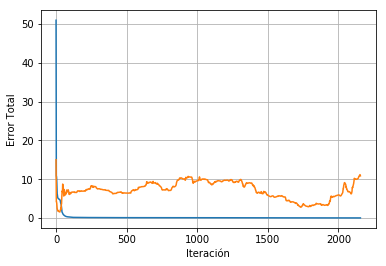

In [763]:
plt.plot(e.Costos)
plt.plot(e.CostosTest)
plt.grid(1)
plt.ylabel("Error Total")
plt.xlabel("Iteración")